 # Business Decision Research

#### Step

1. Data preparation test
    - Importing data: import 'data_retail.csv' to python environment.
    - Cleansing data: cleaning and modification data so that it is ready to be used for further analysis.
2. Data visualization test: get insight from data visualization.
3. Basic stats method test: get insight from model and evaluation model that have been created and tested.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [15]:
# Data Importing
df = pd.read_csv('data_retail.csv')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   Unnamed: 0  no  Row_Num  Customer_ID Product  First_Transaction  \
0           0   1        1        29531   Jaket      1466304274396   
1           1   2        2        29531  Sepatu      1406077331494   
2           2   3        3       141526     Tas      1493349147000   
3           3   4        4       141526   Jaket      1493362372547   
4           4   5        5        37545  Sepatu      1429178498531   

   Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0     1538718482608                     1467681                 22  
1     1545735761270                     1269337                 41  
2     1548322802000                      310915                 30  
3     1547643603911                      722632                 27  
4     1542891221530                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           

In [16]:
# Data Cleansing

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   Unnamed: 0  no  Row_Num  Customer_ID Product             First_Transaction  \
0           0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1           1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2           2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3           3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4           4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info da

### Churn Customers

To determine churn customers according to the given definition:

1. the last transaction
2. classify which customers are churn statuses or not

In [17]:
# Last transaction
print(max(df['Last_Transaction']))

# classify which customers are churn statuses or not with boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('top 5 data:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
top 5 data:
   Unnamed: 0  no  Row_Num  Customer_ID Product             First_Transaction  \
0           0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1           1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2           2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3           3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4           4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    Fals

In [18]:
# Drop columns that not important
#del df['no']
#del df['Row_num']

# Top 5 data
print(df.head())

   Unnamed: 0  no  Row_Num  Customer_ID Product             First_Transaction  \
0           0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1           1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2           2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3           3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4           4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3     

### Customer acquisition by year

Next step is create data visualization in the form a trend of customer acquisition by year using a bar chart

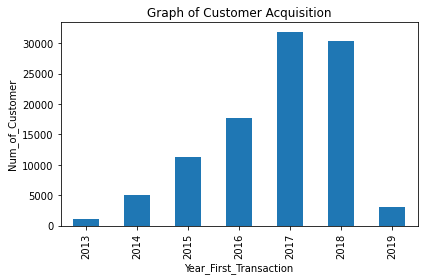

In [19]:
# First transaction year column
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Last transaction year column
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Transaction by year

Visualize the trend of the number of transactions per year using a bar chart.

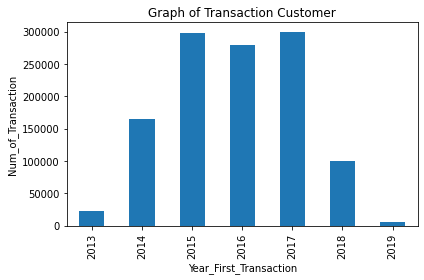

In [20]:
plt.clf()

df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average transaction amount by year

visualize the trend from year to year in the average number of transactions for each product.

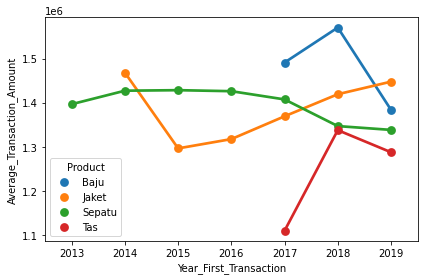

In [21]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### The proportion of churned customers for each product

In terms of churned customers, especially to see how big the proportion of churned customers for each product is, the insight can be known through a pie chart. Visualize the pie charts for the four intended products.

<Figure size 432x288 with 0 Axes>

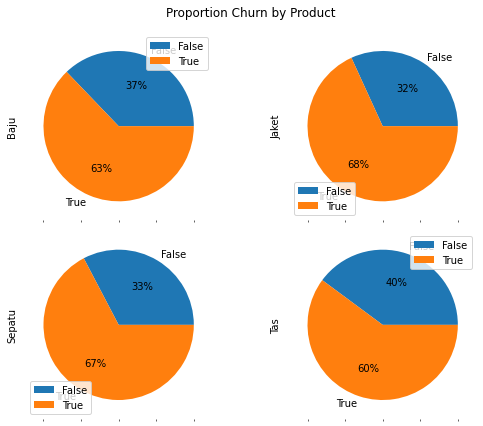

In [22]:
plt.clf()
# pivot data with pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# get Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(8, 6),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi count transaction

Next, we will visualize the distribution of the categorization of count transactions. This categorization is done by grouping the number of transactions as shown in the following table:

       Range of transactions	Categories
                       s/d 1	1. 1
                     2 s/d 3	2. 2 - 3
                     4 s/d 6	3. 4 - 6
                    7 s/d 10	4. 7 - 10
                        > 10	5. > 10

After adding a new column for this category with the name Count_Transaction_Group, then visualize it with a bar chart.

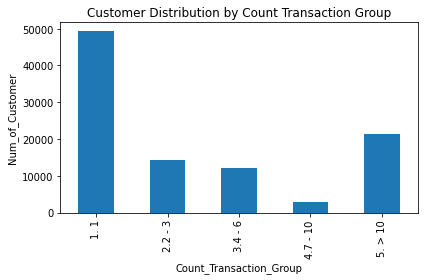

In [23]:
plt.clf()
# Categorization of transaction amount
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5. > 10'
    return val
# adding a new column
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Distribution of categorization of average transaction amount

Next, we will visualize the distribution of the average transaction amount categorization. This categorization is done by grouping the average transaction size as shown in the following table:

               Range of transaction size	Categories
                     100.000 s/d 250.000	1. 100.000 - 250.000
                    >250.000 s/d 500.000	2. >250.000 - 500.000
                    >500.000 s/d 750.000	3. >500.000 - 750.000
                  >750.000 s/d 1.000.000	4. >750.000 - 1.000.000
                >1.000.000 s/d 2.500.000	5. >1.000.000 - 2.500.000
                >2.500.000 s/d 5.000.000	6. >2.500.000 - 5.000.000
               >5.000.000 s/d 10.000.000	7. >5.000.000 - 10.000.000
                             >10.000.000	8. >10.000.000
 
After adding a new column for this category with the name Average_Transaction_Amount_Group, then visualize it with a bar chart.

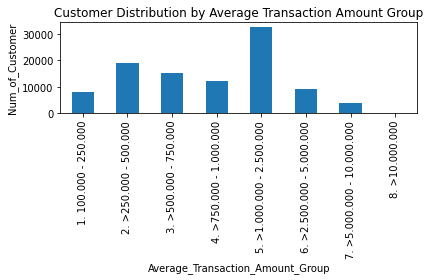

In [24]:
plt.clf()
# Range of transaction size 
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# adding a new column
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Feature Columns and Target

Determine the feature columns of the dataset we have, here the Average_Transaction_Amount, Count_Transaction, and Year_Diff columns are selected. However, the last column does not exist yet. Please first create this Year_Diff column and then assign a dataset with these feature columns as an independent variable X.

For the target, of course, a customer problem with churn conditions or not, assign the dataset for this target to the dependent variable y.

In [25]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Names feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

### Split X and y into training and testing

After the independent variable X and the dependent variable y have been completed, then divide X and y into the training and testing sections. The testing portion is 25% of the total data entry.

In [26]:
from sklearn.model_selection import train_test_split

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Train, predict and evaluate

The next step will be to create a model using Logistic Regression, initialize the model, fit, and then evaluate the model using the confusion matrix.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiation model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluate model with confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


### Visualisasi Confusion Matrix

The previously calculated confusion matrix can be visualized using a heatmap from seaborn. For that show the visualization of this confusion matrix.

<Figure size 432x288 with 0 Axes>

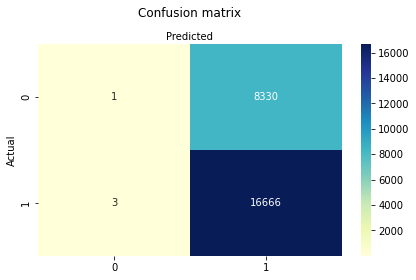

In [28]:
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Accuracy, Precision, and Recall

Then, calculate the accuracy, precision and recall values based on the actual target value and the predicted target value.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
